In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.20.3'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# lab可以不用运行这个命令

In [5]:
from sklearn.tree import DecisionTreeClassifier # 分类树
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.datasets import load_wine# 红酒数据集
from sklearn.model_selection import train_test_split # 训练集和测试集的切分函数

In [6]:
# 导入数据集
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
# 提取特征和标签
wine.data # 特征

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
wine.target  # 标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# 查看数据集的大小
wine.data.shape

(178, 13)

In [12]:
pd.DataFrame(wine.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [26]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [27]:
Xtrain.shape

(124, 13)

In [28]:
Xtest.shape

(54, 13)

In [29]:
# 建立模型
clf=DecisionTreeClassifier(random_state=0) # 决策树实例化
rfc=RandomForestClassifier(random_state=0) # 随机森林实例化

In [30]:
# 用训练集训练模型
clf=clf.fit(Xtrain,Ytrain)  # 训练决策树
rfc=rfc.fit(Xtrain,Ytrain)  # 训练随机森林

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
# 查看模型效果
score_c=clf.score(Xtest,Ytest)
score_r=rfc.score(Xtest,Ytest)

In [34]:
score_c

0.9074074074074074

In [33]:
score_r

1.0

In [36]:
# 绘制一组交叉验证
from sklearn.model_selection import cross_val_score # 交叉验证包

#随机森林的交叉验证
rfc=RandomForestClassifier(n_estimators=25)  # 实例化一个25棵数的森林
rfc_s=cross_val_score(rfc,  #评估器
                      wine.data,  #特征矩阵
                      wine.target, #标签
                      cv=10  #交叉验证折数
                     )   #对模型进行十折交叉验证
#决策树的交叉验证
clf=DecisionTreeClassifier()  #实例化决策树
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)

In [38]:
rfc_s  #随机森林的交叉验证结果

array([0.94736842, 0.94444444, 1.        , 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [39]:
clf_s #决策树交叉验证结果

array([0.89473684, 0.83333333, 0.66666667, 0.88888889, 0.83333333,
       0.83333333, 1.        , 0.88888889, 0.94117647, 1.        ])

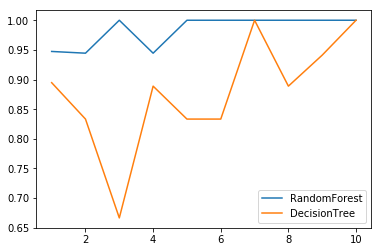

In [40]:
#绘制可视化图形
plt.plot(range(1,11),rfc_s,label='RandomForest')
plt.plot(range(1,11),clf_s,label='DecisionTree')
plt.legend()   #显示图例
plt.show()

RandomForest:
0.9725146198830409
DecisionTree:
0.9002579979360166


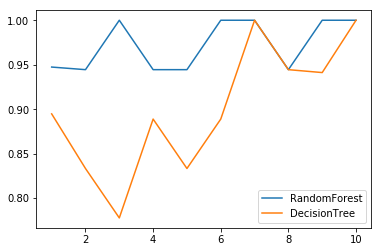

In [41]:
#另一种写法
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"

In [45]:
#绘制10组十折交叉验证
rfc_l=[]
clf_l=[]
for i in range(10):
    rfc=RandomForestClassifier(n_estimators=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

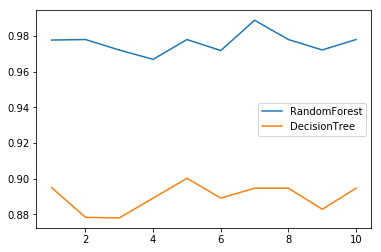

In [46]:
plt.plot(range(1,11),rfc_l,label = "RandomForest")
plt.plot(range(1,11),clf_l,label = "DecisionTree")
plt.legend()
plt.show()

0.9888888888888889 25


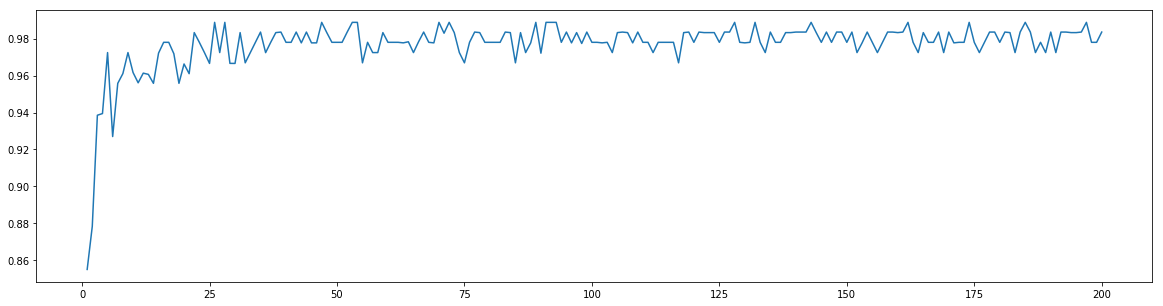

In [48]:
#绘制n_estimators的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [52]:
#25棵树判断错误的可能性
from scipy.special import comb

np.array([comb(25,i)*((1-0.2)**(25-i))for i in range(13,26)])#列表推导式

array([3.57361895e+05, 3.82887745e+05, 3.50980432e+05, 2.74203463e+05,
       1.81458174e+05, 1.00810097e+05, 4.64257024e+04, 1.74096384e+04,
       5.18144000e+03, 1.17760000e+03, 1.92000000e+02, 2.00000000e+01,
       1.00000000e+00])

In [56]:
np.array([comb(25,i)*((0.2**i)*(1-0.2)**(25-i))for i in range(13,26)]).sum()

0.0003690480345558283

In [57]:
#随机森林中的random_state控制的是生成森林的模式
rfc=RandomForestClassifier(n_estimators=20,random_state=2)
rfc=rfc.fit(Xtrain,Ytrain)

In [58]:
#重要属性.estimators_
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [59]:
len(rfc.estimators_)

20

In [60]:
rfc.estimators_[0].random_state

1872583848

In [61]:
for i in range(20):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [73]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [74]:
#重要属性oob_score_
rfc.oob_score_

0.9719101123595506